# EEG.machinelearing_data_BRMH

_No sé por qué Anaconda me lleva a la raíz de mi carpeta en lugar de abrir el notebook en el directorio correcto._
_Comenta esta línea en caso de que el notebook se abra en la raíz correcta._

In [23]:
cd

C:\Users\Jesus


c:\Users\Jesus\.conda\envs\DataScience\Lib\site-packages\IPython\core\magics\osm.py:393: UserWarning: This is now an optional IPython functionality, using bookmarks requires you to install the `pickleshare` library.
  bkms = self.shell.db.get('bookmarks', {})
c:\Users\Jesus\.conda\envs\DataScience\Lib\site-packages\IPython\core\magics\osm.py:428: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [24]:
cd Downloads/icd2024Gortarez/practices

C:\Users\Jesus\Downloads\icd2024Gortarez\practices


c:\Users\Jesus\.conda\envs\DataScience\Lib\site-packages\IPython\core\magics\osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


La segunda práctica consiste en seleccionar un Dataset de interés (se puede elegir el dataset de la práctica 1), y aplicar al menos tres técnicas de los siguientes tipos de procesamiento:
1. Limpieza de datos
2. Aumento de datos
3. Extracción de características
4. Reducción de dimensionalidad
5. Selección de características

Por ejemplo, eliminación de datos incompletos (limpieza de datos), PCA (reducción de dimensionalidad), y ganancia de información (selección de atributos). Sobra decir que se requiere realizar un análisis exploratorio de los datos.

In [25]:
import pandas as pd
import time
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
import matplotlib.pyplot as plt

from sklearn.feature_selection import VarianceThreshold

# Reduccion de dimencionalidad
from sklearn.decomposition import PCA

# Selección de características
from sklearn.feature_selection import SelectKBest, f_classif


## Visión general de los datos (Análisis)

In [26]:
df = pd.read_csv("Practica 2 EEG.machinelearing_data_BRMH.csv")
df.head()

,no.,sex,age,eeg.date,education,IQ,main.disorder,specific.disorder,AB.A.delta.a.FP1,AB.A.delta.b.FP2,...,COH.F.gamma.o.Pz.p.P4,COH.F.gamma.o.Pz.q.T6,COH.F.gamma.o.Pz.r.O1,COH.F.gamma.o.Pz.s.O2,COH.F.gamma.p.P4.q.T6,COH.F.gamma.p.P4.r.O1,COH.F.gamma.p.P4.s.O2,COH.F.gamma.q.T6.r.O1,COH.F.gamma.q.T6.s.O2,COH.F.gamma.r.O1.s.O2
0,1,M,57.0,2012.8.30,NaN,NaN,Addictive disorder,Alcohol use disorder,35.998557,21.717375,...,55.989192,16.739679,23.452271,45.678820,30.167520,16.918761,48.850427,9.422630,34.507082,28.613029
1,2,M,37.0,2012.9.6,6.0,120.0,Addictive disorder,Alcohol use disorder,13.425118,11.002916,...,45.595619,17.510824,26.777368,28.201062,57.108861,32.375401,60.351749,13.900981,57.831848,43.463261
2,3,M,32.0,2012.9.10,16.0,113.0,Addictive disorder,Alcohol use disorder,29.941780,27.544684,...,99.475453,70.654171,39.131547,69.920996,71.063644,38.534505,69.908764,27.180532,64.803155,31.485799
3,4,M,35.0,2012.10.8,18.0,126.0,Addictive disorder,Alcohol use disorder,21.496226,21.846832,...,59.986561,63.822201,36.478254,47.117006,84.658376,24.724096,50.299349,35.319695,79.822944,41.141873
4,5,M,36.0,2012.10.18,16.0,112.0,Addictive disorder,Alcohol use disorder,37.775667,33.607679,...,61.462720,59.166097,51.465531,58.635415,80.685608,62.138436,75.888749,61.003944,87.455509,70.531662


***Imprime un resumen del DataFrame, mostrando información sobre las columnas, el tipo de datos, y cuántos valores no nulos tiene cada una. Necesario para asegurarse de que la base de datos no caresca de algun dato.***

In [27]:
print(df.info(1))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 945 entries, 0 to 944
Data columns (total 1149 columns):
 #     Column                      Dtype  
---    ------                      -----  
 0     no.                         int64  
 1     sex                         object 
 2     age                         float64
 3     eeg.date                    object 
 4     education                   float64
 5     IQ                          float64
 6     main.disorder               object 
 7     specific.disorder           object 
 8     AB.A.delta.a.FP1            float64
 9     AB.A.delta.b.FP2            float64
 10    AB.A.delta.c.F7             float64
 11    AB.A.delta.d.F3             float64
 12    AB.A.delta.e.Fz             float64
 13    AB.A.delta.f.F4             float64
 14    AB.A.delta.g.F8             float64
 15    AB.A.delta.h.T3             float64
 16    AB.A.delta.i.C3             float64
 17    AB.A.delta.j.Cz             float64
 18    AB.A.delta.k.C4           

***Imprime las dimensiones del DataFrame en forma de una tupla (número de filas, número de columnas)***

In [28]:
print(df.shape)

(945, 1149)


***Muestra la cantidad de valores faltantes (NaN) en las columnas donde falten datos del DataFrame.***

In [29]:
null_counts = df.isnull().sum()
columns_with_nulls = null_counts[null_counts > 0]
print(columns_with_nulls)


education        15
IQ               13
Unnamed: 122    945
dtype: int64


***Muestra el número de datos duplicados en caso de existir.***

In [30]:
df.duplicated().sum()

0

---

## Limpieza de datos

Borrare las columnas no necesarias para esta practica, en este caso, el numero de la persona,  la fecha del EEG, la educación y el desorden especifico ya que solo usaremos el desorden principal

In [31]:
df = df.drop(labels=['no.', 'eeg.date', 'education', 'specific.disorder'], axis=1)

Iniciare primero con los datos que no pertenecen al espectrograma  sex, age, IQ, main.disorder, specific.disorder	

In [32]:
column_list = df.columns.values.tolist()
no_espectral_column = ['sex', 'age', 'IQ', 'main.disorder']
for column_name in no_espectral_column:
    print(column_name,":",df[column_name].unique())
    
df.value_counts(normalize=True)

count = df.nunique()

sex : ['M' 'F']
age : [57.   37.   32.   35.   36.   24.   26.   23.   30.   34.   20.   28.
 31.   25.   39.   29.   19.7  19.94 19.26 25.61 24.58 30.34 40.28 19.47
 21.68 46.84 26.56 32.94 22.65 21.24 26.13 23.6  54.82 26.15 28.26 30.19
 23.01 46.01 50.48 28.01 31.9  26.01 21.25 28.77 26.28 33.   27.   22.
 21.   19.   32.87 20.24 19.89 39.18 28.42 21.07 20.48 20.55 38.71 56.55
 21.84 25.36 34.03 23.59 46.78 24.68 40.94 25.97 21.08 54.56 28.67 18.19
 22.9  18.24 34.16 42.35 35.16 25.65 18.89 38.52 19.21 24.42 23.66 28.29
 33.62 28.15 30.45 19.48 25.05 28.32 23.44 29.86 33.55 27.59 29.47 36.06
 18.07 18.39 29.04 18.   40.   28.81 29.22 34.48 33.9  26.26 33.57 19.51
 23.67 18.77 24.53 23.28 37.72 44.42 21.03 36.62 56.51 53.68 23.52 30.99
 51.8  30.32 25.72 25.53 29.08 18.34 23.2  55.21 26.93 24.56 28.56 33.44
 47.76 26.71 19.25 57.63 23.45 23.64 33.97 42.74 36.96 23.42 23.96 21.05
 31.57 19.22 23.06 31.41 20.6  47.32 41.38 34.52 18.78 26.2  22.84 20.28
 25.14 40.88 47.93 18.69 25.2  47

***Teniendo esto y lo anterior podemos ver varios detalles:***
1. 'Obsessive compulsitve disorder' aunque parece ser que fue un error de copiar pegar ya que el error es de todo, o bien quisieron diferenciar el 'Obsessive compulsive disorder' del main.disorder contra el specific.disorder 'Obsessive compulsitve disorder'. Esto ultimo me parece razonable. 
2. Existe una columna que esta vacia, tanto de nombre como de datos, posiblemente se uso como un separador.
3. Existen datos faltantes en IQ, para esta practica decidi eliminar las filas que tengan esa columna faltante.
4. Se cambiaran los datos no numericos por numericos

In [33]:
# Solucion 2
df = df.dropna(axis=1)

# Solucion 3
df = df.dropna(axis=0)

# Solucion 4
dict = {
    'Healthy control': 0,
    'Trauma and stress related disorder': 1,
    'Mood disorder': 2,
    'Addictive disorder': 3,
    'Obsessive compulsive disorder': 4,
    'Schizophrenia': 5,
    'Anxiety disorder': 6
}
df['main.disorder'] = df['main.disorder'].replace(dict).astype(int)

df['sex'] = df['sex'].replace({'M': 0, 'F': 1}).astype(int)


df.head()

C:\Users\Jesus\AppData\Local\Temp\ipykernel_17308\353666221.py:17: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['main.disorder'] = df['main.disorder'].replace(dict).astype(int)
C:\Users\Jesus\AppData\Local\Temp\ipykernel_17308\353666221.py:19: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['sex'] = df['sex'].replace({'M': 0, 'F': 1}).astype(int)


,sex,age,main.disorder,AB.A.delta.a.FP1,AB.A.delta.b.FP2,AB.A.delta.c.F7,AB.A.delta.d.F3,AB.A.delta.e.Fz,AB.A.delta.f.F4,AB.A.delta.g.F8,...,COH.F.gamma.o.Pz.p.P4,COH.F.gamma.o.Pz.q.T6,COH.F.gamma.o.Pz.r.O1,COH.F.gamma.o.Pz.s.O2,COH.F.gamma.p.P4.q.T6,COH.F.gamma.p.P4.r.O1,COH.F.gamma.p.P4.s.O2,COH.F.gamma.q.T6.r.O1,COH.F.gamma.q.T6.s.O2,COH.F.gamma.r.O1.s.O2
0,0,57.0,3,35.998557,21.717375,21.518280,26.825048,26.611516,25.732649,16.563408,...,55.989192,16.739679,23.452271,45.678820,30.167520,16.918761,48.850427,9.422630,34.507082,28.613029
1,0,37.0,3,13.425118,11.002916,11.942516,15.272216,14.151570,12.456034,8.436832,...,45.595619,17.510824,26.777368,28.201062,57.108861,32.375401,60.351749,13.900981,57.831848,43.463261
2,0,32.0,3,29.941780,27.544684,17.150159,23.608960,27.087811,13.541237,16.523963,...,99.475453,70.654171,39.131547,69.920996,71.063644,38.534505,69.908764,27.180532,64.803155,31.485799
3,0,35.0,3,21.496226,21.846832,17.364316,13.833701,14.100954,13.100939,14.613650,...,59.986561,63.822201,36.478254,47.117006,84.658376,24.724096,50.299349,35.319695,79.822944,41.141873
4,0,36.0,3,37.775667,33.607679,21.865556,21.771413,22.854536,21.456377,15.969042,...,61.462720,59.166097,51.465531,58.635415,80.685608,62.138436,75.888749,61.003944,87.455509,70.531662


In [34]:
main_disorder = df.pop('main.disorder')
df.insert(0, 'main.disorder', main_disorder)

In [35]:
df.to_csv('EEG.csv', sep=',', encoding='utf-8', index=False, header=True)
df.iloc[:200, :200].to_csv('EEG2.csv', sep=',', encoding='utf-8', index=False, header=True)

# Reducción de dimensionalidad

## Datos para reducción de dimensionalidad

In [36]:
X = df.drop(columns=['main.disorder'])
y = df['main.disorder']

# Estandarizo los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [37]:
n_classes = y.nunique()
n_components = n_classes - 1

lda = LDA(n_components=n_components)
lda_features = lda.fit_transform(X_scaled, y)

lda_columns = [f'lda_componente_{i+1}' for i in range(n_components)]
df_lda = pd.DataFrame(data = lda_features, columns = lda_columns)

df_final = pd.concat([y, df_lda], axis = 1)

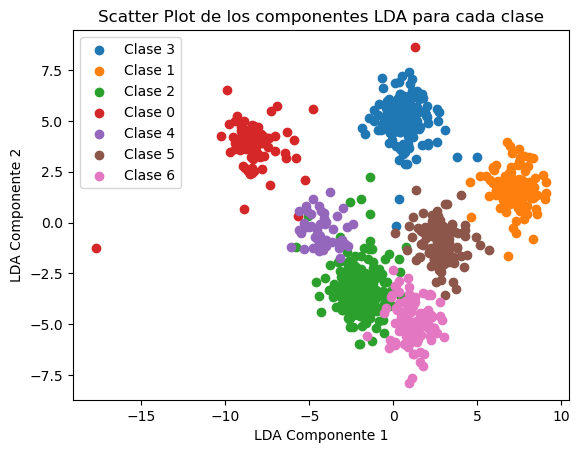

In [38]:
classes = df_final['main.disorder'].unique()


for cls in classes:
  class_data = df_final[df_final['main.disorder'] == cls]
  plt.scatter(class_data['lda_componente_1'], class_data['lda_componente_2'], label=f'Clase {cls}')

plt.xlabel('LDA Componente 1')
plt.ylabel('LDA Componente 2')
plt.title('Scatter Plot de los componentes LDA para cada clase')
plt.legend()

# Show the plot
plt.show()

# Selección de características

## Univariate feature selection

In [39]:
# start time
start_time_forward = time.time()

### Applying feature selection method
select_kbest = SelectKBest(score_func=f_classif, k=10)  # change k
select_kbest.fit_transform(X, y)

# end time
end_time_forward = time.time()
time_forward = end_time_forward - start_time_forward

# show feature selection
selected_features = select_kbest.get_support()
print('The selected features are:', list(X.columns[selected_features]))

for features in list(X.columns[selected_features]):
    print(features)


# show elapsed time of this method
print(f"Execution time: {time_forward:.2f} seconds")

The selected features are: ['sex', 'age', 'AB.A.delta.q.T6', 'AB.A.delta.r.O1', 'AB.D.beta.a.FP1', 'AB.D.beta.f.F4', 'AB.D.beta.g.F8', 'COH.A.delta.a.FP1.e.Fz', 'COH.A.delta.b.FP2.e.Fz', 'COH.B.theta.a.FP1.e.Fz']
sex
age
AB.A.delta.q.T6
AB.A.delta.r.O1
AB.D.beta.a.FP1
AB.D.beta.f.F4
AB.D.beta.g.F8
COH.A.delta.a.FP1.e.Fz
COH.A.delta.b.FP2.e.Fz
COH.B.theta.a.FP1.e.Fz
Execution time: 0.06 seconds


## Correlation coefficient

In [40]:
# start time
start_time_forward = time.time()

### Applying feature selection method
correlation_matrix = df.corr()
corr_with_target = correlation_matrix["main.disorder"].drop("main.disorder")

# end time
end_time_forward = time.time()
time_forward = end_time_forward - start_time_forward

# Sort and show features by absolute correlation value
sorted_corr = corr_with_target.abs().sort_values(ascending=False)
print(f"Absolute Correlations with the Objective (main.disorder):\n{sorted_corr}")

# Define a threshold for correlation (e.g., keep features with |correlation| > 0.2)
threshold = 0.1
selected_features_corr = sorted_corr[sorted_corr > threshold].index.tolist()
print(f"Selected features are: {selected_features_corr}")
for features in selected_features_corr:
    print(features)
# show elapsed time of this method
print(f"Execution time: {time_forward:.2f} seconds")


Absolute Correlations with the Objective (main.disorder):
sex                       0.142892
COH.C.alpha.a.FP1.e.Fz    0.121706
COH.B.theta.a.FP1.e.Fz    0.116610
COH.B.theta.a.FP1.f.F4    0.110407
COH.B.theta.d.F3.e.Fz     0.105527
                            ...   
COH.A.delta.f.F4.h.T3     0.000148
COH.F.gamma.i.C3.q.T6     0.000106
COH.C.alpha.d.F3.h.T3     0.000085
COH.F.gamma.g.F8.k.C4     0.000051
COH.A.delta.h.T3.j.Cz     0.000025
Name: main.disorder, Length: 1142, dtype: float64
Selected features are: ['sex', 'COH.C.alpha.a.FP1.e.Fz', 'COH.B.theta.a.FP1.e.Fz', 'COH.B.theta.a.FP1.f.F4', 'COH.B.theta.d.F3.e.Fz', 'COH.D.beta.d.F3.e.Fz', 'COH.B.theta.e.Fz.f.F4', 'COH.B.theta.a.FP1.b.FP2', 'COH.C.alpha.a.FP1.f.F4']
sex
COH.C.alpha.a.FP1.e.Fz
COH.B.theta.a.FP1.e.Fz
COH.B.theta.a.FP1.f.F4
COH.B.theta.d.F3.e.Fz
COH.D.beta.d.F3.e.Fz
COH.B.theta.e.Fz.f.F4
COH.B.theta.a.FP1.b.FP2
COH.C.alpha.a.FP1.f.F4
Execution time: 3.14 seconds


## Low variance

In [21]:
# start time
start_time_forward = time.time()

### Applying feature selection method
sel = VarianceThreshold(threshold=0.1)
sel.fit_transform(X)

# end time
end_time_forward = time.time()
time_forward = end_time_forward - start_time_forward

# show feature selection
selected_features = sel.get_support()
print('The selected features are:', list(X.columns[selected_features]))
for features in list(X.columns[selected_features]):
    print(features)
# show elapsed time of this method
print(f"Execution time: {time_forward:.2f} seconds")

The selected features are: ['sex', 'age', 'AB.A.delta.a.FP1', 'AB.A.delta.b.FP2', 'AB.A.delta.c.F7', 'AB.A.delta.d.F3', 'AB.A.delta.e.Fz', 'AB.A.delta.f.F4', 'AB.A.delta.g.F8', 'AB.A.delta.h.T3', 'AB.A.delta.i.C3', 'AB.A.delta.j.Cz', 'AB.A.delta.k.C4', 'AB.A.delta.l.T4', 'AB.A.delta.m.T5', 'AB.A.delta.n.P3', 'AB.A.delta.o.Pz', 'AB.A.delta.p.P4', 'AB.A.delta.q.T6', 'AB.A.delta.r.O1', 'AB.A.delta.s.O2', 'AB.B.theta.a.FP1', 'AB.B.theta.b.FP2', 'AB.B.theta.c.F7', 'AB.B.theta.d.F3', 'AB.B.theta.e.Fz', 'AB.B.theta.f.F4', 'AB.B.theta.g.F8', 'AB.B.theta.h.T3', 'AB.B.theta.i.C3', 'AB.B.theta.j.Cz', 'AB.B.theta.k.C4', 'AB.B.theta.l.T4', 'AB.B.theta.m.T5', 'AB.B.theta.n.P3', 'AB.B.theta.o.Pz', 'AB.B.theta.p.P4', 'AB.B.theta.q.T6', 'AB.B.theta.r.O1', 'AB.B.theta.s.O2', 'AB.C.alpha.a.FP1', 'AB.C.alpha.b.FP2', 'AB.C.alpha.c.F7', 'AB.C.alpha.d.F3', 'AB.C.alpha.e.Fz', 'AB.C.alpha.f.F4', 'AB.C.alpha.g.F8', 'AB.C.alpha.h.T3', 'AB.C.alpha.i.C3', 'AB.C.alpha.j.Cz', 'AB.C.alpha.k.C4', 'AB.C.alpha.l.T4', 'A

## Backward elimination

In [ ]:
# start time
start_time_forward = time.time()

### Applying feature selection method
bfs = SequentialFeatureSelector(lr, n_features_to_select='auto', direction='backward')
bfs.fit(X, y)

# end time
end_time_forward = time.time()
time_forward = end_time_forward - start_time_forward

# show feature selection
selected_features = bfs.get_support()
print('The selected features are:', list(X.columns[selected_features]))
for features in list(X.columns[selected_features]):
    print(features)
# show elapsed time of this method
print(f"Execution time: {time_forward:.2f} seconds")

Después de 35 min decide detenerlo

# Conclusiones

Con la selección de características, podemos excluir los datos menos significativos, ya que en este conjunto de datos, las variables muestran muy poca relación entre sí. Si bien la reducción de dimensionalidad es de gran ayuda, no siempre ofrece una solución completamente precisa. 